In [2]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error #均方误差
from sklearn.metrics import mean_absolute_error #平方绝对误差
from sklearn.metrics import r2_score  #R square

In [4]:
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False

In [5]:
dir_open = r'D:\DoctoralThesis\CorrForScattAna'
dir_write = dir_open

In [110]:
dfGDCalCDOMBRMaxCorrModel20102020 = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)TwoBandRatioModelCalibration.xlsx"),
                                                     index_col ='Wavelength')
dfGDValCDOMBRMaxCorrModel20102020 = pd.read_excel(os.path.join(dir_open,"CDOM(88Points)TwoBandRatioModelValidation.xlsx"),
                                                     index_col = 'Wavelength')
dfCalSpecCDOMBRMaxCorr = dfGDCalCDOMBRMaxCorrModel20102020['512/508']
dfValSpecCDOMBRMaxCorr = dfGDValCDOMBRMaxCorrModel20102020['512/508']

dfCalMeasuredCDOM = dfGDCalCDOMBRMaxCorrModel20102020['CDOM']
lenCalCDOMSamplingPointsNum = len(dfCalMeasuredCDOM)
dfValMeasuredCDOM = dfGDValCDOMBRMaxCorrModel20102020['CDOM']
lenValCDOMSamplingPointsNum = len(dfValMeasuredCDOM)

In [111]:
regrCalBRMaxMeaCDOM = linear_model.LinearRegression()
regrCalBRMaxMeaCDOM.fit(np.array(dfCalSpecCDOMBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1),
                           np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1))
myK_CalBRMaxMeaCDOM = "%.2f" %regrCalBRMaxMeaCDOM.coef_    
myIntercept_CalBRMaxMeaCDOM = "%.2f" %regrCalBRMaxMeaCDOM.intercept_   
predictedGDCalCDOM20102020 = regrCalBRMaxMeaCDOM.predict(np.array(dfCalSpecCDOMBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1))

myMSE_CalBRMaxMeaCDOM = mean_squared_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                              predictedGDCalCDOM20102020)
print("MSE_CalBRMaxMeaCDOM:\t{0}".format(myMSE_CalBRMaxMeaCDOM))
myRMSE_CalBRMaxMeaCDOM = np.sqrt(mean_squared_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                                       predictedGDCalCDOM20102020))
print("RMSE_CalBRMaxMeaCDOM:\t{0}".format(myRMSE_CalBRMaxMeaCDOM)) 
myMAE_CalBRMaxMeaCDOM = mean_absolute_error(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                               predictedGDCalCDOM20102020)
print("MAE_CalBRMaxMeaCDOM:\t{0}".format(myMAE_CalBRMaxMeaCDOM))
myR2_CalBRMaxMeaCDOM = r2_score(np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),
                                   predictedGDCalCDOM20102020)
print("R2_CalBRMaxMeaCDOM:\t{0}".format(myR2_CalBRMaxMeaCDOM))

MSE_CalBRMaxMeaCDOM:	0.04934413175870232
RMSE_CalBRMaxMeaCDOM:	0.22213539060379894
MAE_CalBRMaxMeaCDOM:	0.18942250286425966
R2_CalBRMaxMeaCDOM:	0.5772618036906778


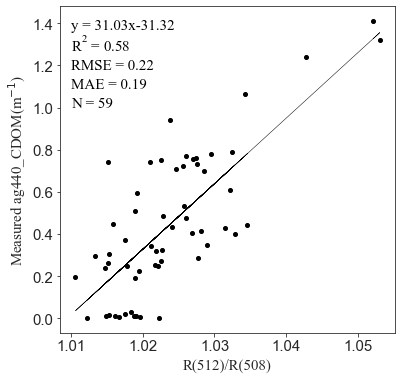

In [115]:
xCalSpecCDOMBRMaxCorr = np.array(dfCalSpecCDOMBRMaxCorr).reshape(lenCalCDOMSamplingPointsNum,1)
yCalSpecCDOMBRMaxCorr = np.array(predictedGDCalCDOM20102020).reshape(lenCalCDOMSamplingPointsNum,1)
plt.figure(figsize=(6,6))

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(xCalSpecCDOMBRMaxCorr,yCalSpecCDOMBRMaxCorr,linewidth = 0.5,color = "k")

plt.xlabel('R(512)/R(508)',fontproperties = 'Times New Roman',fontsize=15) 
plt.ylabel('Measured ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize=15) 

plt.text(1.01,1.37,"y = {k}x{b}".format(k = myK_CalBRMaxMeaCDOM,b = myIntercept_CalBRMaxMeaCDOM), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")
plt.text(1.01,1.27,"$\mathregular{R^2}$ = %.2f"%myR2_CalBRMaxMeaCDOM,fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(1.01,1.18,"RMSE = %.2f"%myRMSE_CalBRMaxMeaCDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(1.01,1.09,"MAE = %.2f"%myMAE_CalBRMaxMeaCDOM,fontproperties = 'Times New Roman', size = 15,color = "k",weight = "light")
plt.text(1.01,1,"N = {lenCalCDOMSamplingPointsNum}".format(lenCalCDOMSamplingPointsNum = lenCalCDOMSamplingPointsNum), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.plot(xCalSpecCDOMBRMaxCorr,np.array(dfCalMeasuredCDOM).reshape(lenCalCDOMSamplingPointsNum,1),'o',color='k',
         label="Calibration", markersize = 4)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)TBRCalibration.jpg'),
            dpi=300,bbox_inches='tight')
plt.show()

In [55]:
predictedGDValCDOM20102020 = regrCalBRMaxMeaCDOM.predict(np.array(dfValSpecCDOMBRMaxCorr).reshape(lenValCDOMSamplingPointsNum,1))
regrMeaPreCDOM = linear_model.LinearRegression()
regrMeaPreCDOM.fit(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),predictedGDValCDOM20102020)
myK_Mea_PreCDOM = "%.2f" %regrMeaPreCDOM.coef_    
myIntercept_Mea_PreCDOM = "%.2f" %regrMeaPreCDOM.intercept_   

myMSE_ValBRMaxMeaCDOM = mean_squared_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                              predictedGDValCDOM20102020)
print("MSE_ValBRMaxMeaCDOM:\t{0}".format(myMSE_ValBRMaxMeaCDOM))
myRMSE_ValBRMaxMeaCDOM = np.sqrt(mean_squared_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                                       predictedGDValCDOM20102020))
print("RMSE_ValBRMaxMeaCDOM:\t{0}".format(myRMSE_ValBRMaxMeaCDOM)) 
myMAE_ValBRMaxMeaCDOM = mean_absolute_error(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                               predictedGDValCDOM20102020)
print("MAE_ValBRMaxMeaCDOM:\t{0}".format(myMAE_ValBRMaxMeaCDOM))
myR2_ValBRMaxMeaCDOM = r2_score(np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1),
                                   predictedGDValCDOM20102020)
print("R2_ValBRMaxMeaCDOM:\t{0}".format(myR2_ValBRMaxMeaCDOM))

MSE_ValBRMaxMeaCDOM:	0.043368944862956116
RMSE_ValBRMaxMeaCDOM:	0.20825211850772637
MAE_ValBRMaxMeaCDOM:	0.17101292501222554
R2_ValBRMaxMeaCDOM:	0.6134948463138088


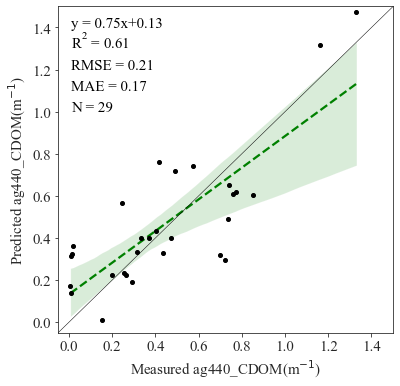

In [59]:
xValMeasuredCDOM = np.array(dfValMeasuredCDOM).reshape(lenValCDOMSamplingPointsNum,1)
yPredValMeasuredCDOM = predictedGDValCDOM20102020
plt.figure(figsize=(6,6))

sns.set_style("ticks",{"xtick.major.size": 8, "ytick.major.size": 8}) 

sns.regplot(x=xValMeasuredCDOM,y=yPredValMeasuredCDOM, scatter=False, marker= 'o',color='k',
            line_kws={'linestyle':'--','color':'green'}, 
            label="Validation",truncate=True,ci=95)

plt.xlim((-0.05,1.5))
plt.ylim((-0.05,1.5))
plt.xticks(fontproperties = 'Times New Roman',fontsize = 15)
plt.yticks(fontproperties = 'Times New Roman',fontsize = 15)

z = range(-1,3,1)
plt.plot(z,z,linewidth = 0.5,color = "k")

plt.xlabel('Measured ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize = 15)  
plt.ylabel('Predicted ag440_CDOM(m$^{-1}$)',fontproperties = 'Times New Roman',fontsize = 15)

plt.text(0.01,1.4,"y = {k}x+{b}".format(k = myK_Mea_PreCDOM,b = myIntercept_Mea_PreCDOM),fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(0.01,1.3,"$\mathregular{R^2}$ = %.2f"%myR2_ValBRMaxMeaCDOM, fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(0.01,1.2,"RMSE = %.2f"%myRMSE_ValBRMaxMeaCDOM,fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(0.01,1.1,"MAE = %.2f"%myMAE_ValBRMaxMeaCDOM,fontproperties = 'Times New Roman',
         size = 15,color = "k",weight = "light")
plt.text(0.01,1.0,"N = {lenValCDOMSamplingPointsNum}".format(lenValCDOMSamplingPointsNum = lenValCDOMSamplingPointsNum), 
         fontproperties = 'Times New Roman',size = 15,color = "k",weight = "light")

plt.plot(xValMeasuredCDOM,yPredValMeasuredCDOM,'o',color='k',label="Validation", markersize = 4)

plt.savefig(os.path.join(dir_write,'CDOM(88Points)TBRPreValidation.jpg'),
            dpi=300,bbox_inches='tight')
plt.show()